Take your favorite novel (or simply the one available in an electronic version) and look for:1
1. chracter mentions pro page,
2. top 20 keyword,
3. sentiment of every chapter and/or page,
4. graph of co-occurences (defined as mentions on the same page).

Visualize the results.

# Solution

We will be usin `ebooklib` library for manipulating epub files, `bs4` for parsing HTML data, `re` for filtering it further, `spaCy` for text analysis and `networkx` combined with `matplotlib` for data visualization.

In [150]:
# Handling epub files.
import ebooklib
from ebooklib import epub
# Parsing HTML data.
from bs4 import BeautifulSoup
# For parsing the text data.
import re
# Text analysis.
import string
import collections
import itertools
import spacy
# Graph construction and visualization.
import networkx as nx
import matplotlib.pyplot as plt

In [54]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [20, 12]

# Reading the `epub` file.

In [2]:
PATH = r'./data/Eco, Umberto/Name of the Rose, The/Eco, Umberto - Name of the Rose, The (Harcourt, 2014).epub'
book_epub = epub.read_epub(PATH)

After reading the file we will extract its contents as a generator of HTML documents.

In [3]:
html_docs = list(book_epub.get_items_of_type(ebooklib.ITEM_DOCUMENT))

# Parsing HTML data
For extracting text data from the HTML documents we will just single method from `bs4` library.

In [4]:
sections = []
for html_doc in html_docs:
    sections.append(BeautifulSoup(html_doc.get_body_content()).get_text())

Anyone who read the book knows that chapter starts with a time of day and a short note (most time ambiguous) about what's going to happen, e.g.

In [5]:
print(sections[10][:300] + ' [...]')  # Only first 300 characters.


Prime

In which the foot of the abbey is reached, and William demonstrates his great acumen.

 
It was a beautiful morning at the end of November. During the night it had snowed, but only a little, and the earth was covered with a cool blanket no more than three fingers high. In the darkness, immed [...]


We can use that information to extract only those sections which are proper chapters (leaving pages as info about author or prologue out of equation).

For that we will use a relatively simple regex.

In [6]:
chapters = [section for section in sections if re.match(r'^\n.+\n\n.+\n\n', section)]

In [7]:
len(chapters)

47

As we can can see we are left with only 47 chapters.

# Inital analysis.

To check how many character mentions are in each chapter, we will define a list of characters (which, fortunately, is relatively short - action takes place in a monstery after all).

In [29]:
CHARACTERS = [
    'William',
    'Adso',
    'Abo',
    'Bernard Gui',
    'Jorge',
    'Malachi',
    'Severinus',
    'Adelmo',
    'Alinardo',
    'Aymaro',
    'Benno',
    'Berengar',
    'Jerome',
    'Michael',
    'Hugh',
    'Marsilis',
    'Michael',
    'Nicholas',
    'Pacificus',
    'Remigio',
    'Salvatore',
    'Ubertino',
    'Venantius',
    'Village girl'
]

In [41]:
mentions = []
for chapter in chapters:
    chapter_mentions = []
    for name in CHARACTERS:
        chapter_mentions.extend(re.findall(name, chapter))
    mentions.append(chapter_mentions)

In [43]:
mentions_counts = [collections.Counter(characters) for characters in mentions]

In [45]:
mentions_per_character = {k: [] for k in CHARACTERS}
for mentions_count in mentions_counts:
    for character, count in mentions_per_character.items():
        count.append(mentions_count[character])

Visualizations:

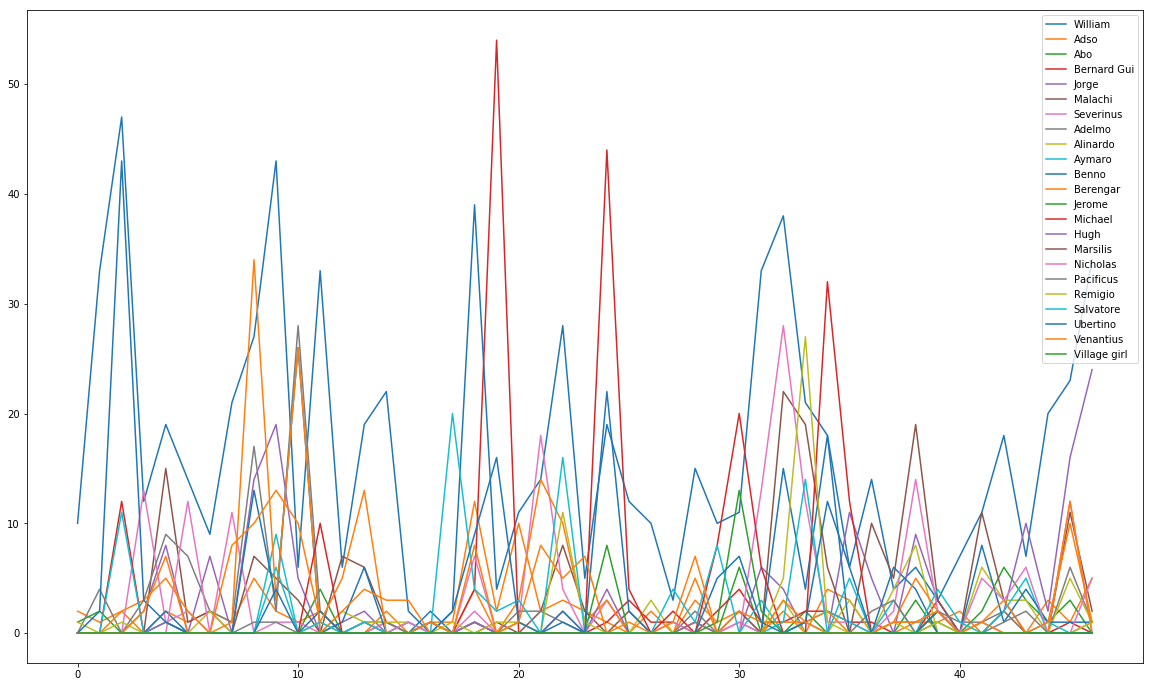

In [61]:
for character, counts in mentions_per_character.items():
    plt.plot(counts, label=character)
plt.legend()
plt.show()

tmp

In [65]:
full_text = '\n'.join([*chapters])

In [72]:
text_without_punctuation = full_text.translate(str.maketrans('', '', string.punctuation))

In [75]:
words = text_without_punctuation.split()

tmp

# Analysis using `spaCy`
For analyzing the language we will use the `spaCy` library ... 

In [105]:
nlp = spacy.load('en_core_web_sm')

Top 20 keywords:

In [106]:
full_doc = nlp(full_text)

In [137]:
keywords = [tag.text for tag in full_doc if tag.pos_ == 'NOUN']

In [140]:
top20 = collections.Counter(keywords).most_common(21)[1:]

In [142]:
top_keywords = [word for word, count in top20]
top_counts = [count for word, count in top20]

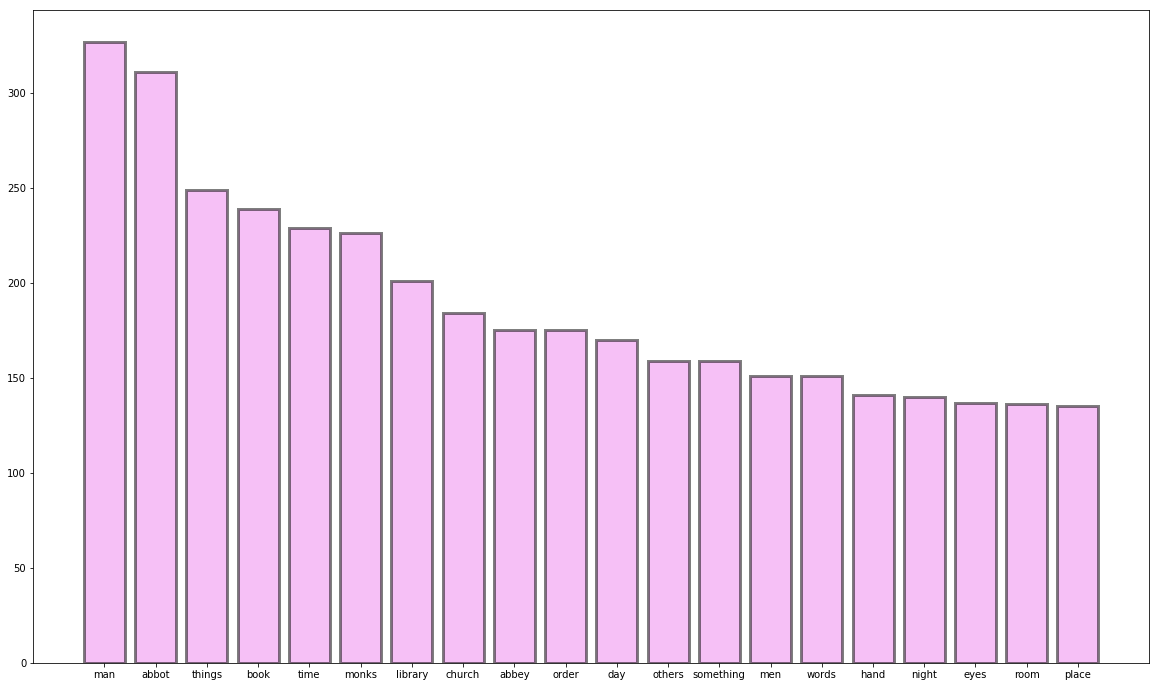

In [196]:
plt.bar(top_keywords, top_counts, alpha=0.5, linewidth=3, edgecolor='k', color='violet')
plt.show()

Graph of co-occurences

In [192]:
graph = nx.Graph()
for chapter_mentions in mentions_counts[2:5]:
    graph.add_edges_from(itertools.permutations(chapter_mentions.keys(), 2))

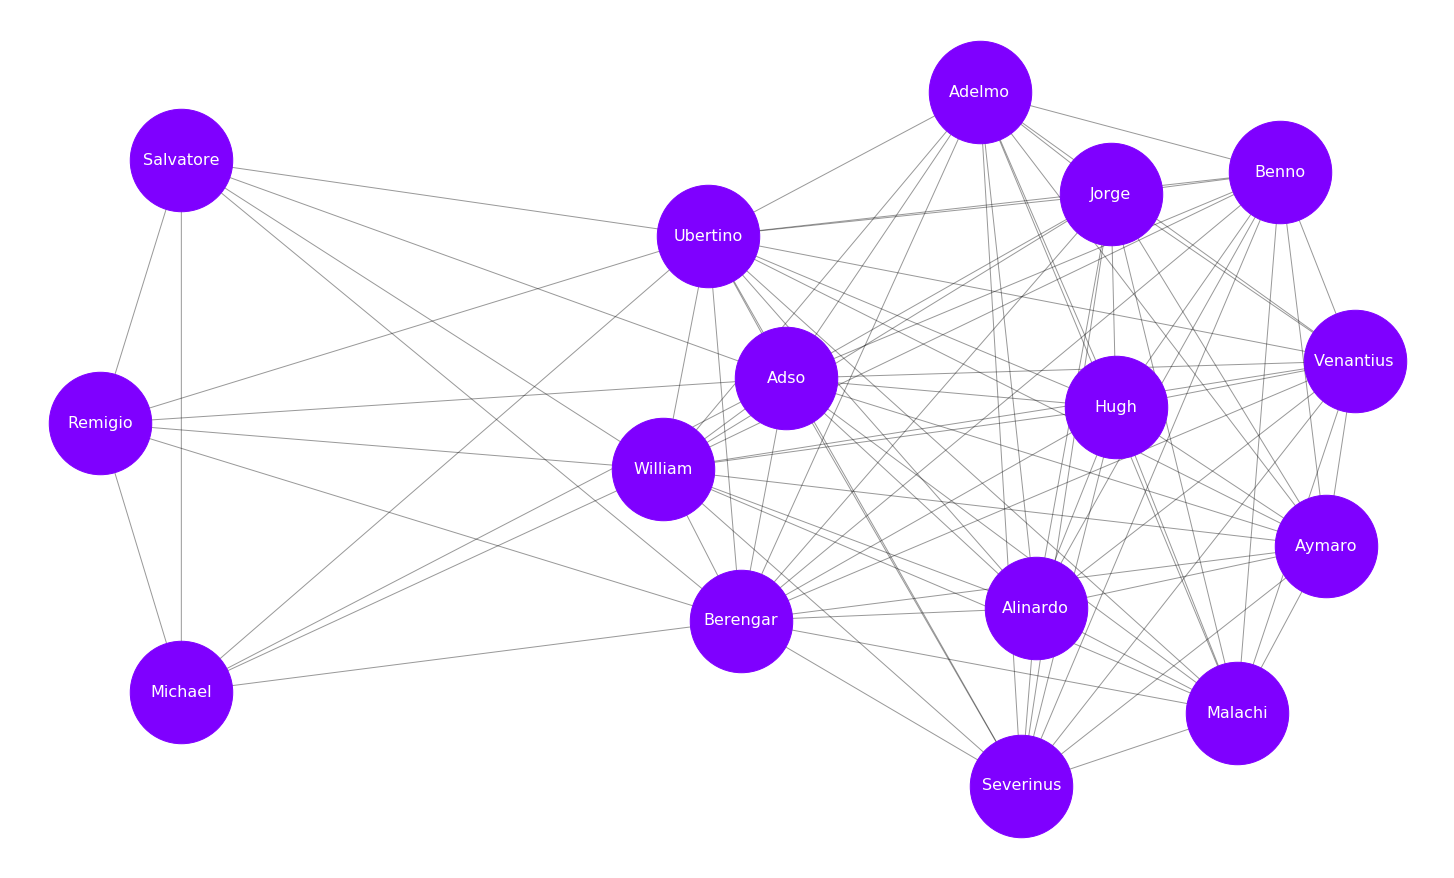

In [193]:
nx.draw(graph, 
        with_labels=True, 
        node_size=10500, 
        font_color='w', 
        font_size=16, 
        edge_color=(0, 0, 0, 0.4), 
        node_color='#7F00FF')

In [ ]:
docs = []
for chapter in chapters:
    docs.append(nlp(chapter))

Character mentions per chapter

In [ ]:
'William' in docs[0].text

In [ ]:
[doc.ents for doc in docs]

In [ ]:
character_mentions = []
for doc in docs:
    character_mentions.append([ent.text for ent in doc.ents if ent.label_ == 'PERSON'])


In [ ]:
import collections

In [ ]:
[collections.Counter(mention) for mention in character_mentions]

In [ ]:
for token in doc:
    print(token.text, token.pos_)

In [ ]:
set([ent.text for ent in doc.ents if ent.label_ == 'PERSON'])

In [ ]:
for ent in doc.ents:
    print(ent.text, ent.label_)

In [ ]:
[token for token in doc if token.pos_ == 'PROPN']